In [1]:
import pandas as pd
import ast
from matplotlib.lines import Line2D

In [2]:
from ogb.graphproppred import GraphPropPredDataset

dataset = GraphPropPredDataset(name = "ogbg-molpcba")

split_idx = dataset.get_idx_split()
train_idx, valid_idx, test_idx = split_idx["train"], split_idx["valid"], split_idx["test"]

graph, label = dataset[349519]

In [3]:
num_nodes_list = [(i, dataset[i][0]['num_nodes']) for i in range(len(dataset))]

num_nodes_list.sort(key=lambda x: x[1], reverse=True)

top_5_graphs = num_nodes_list[:120]

for idx, num_nodes in top_5_graphs:
    print(f"Graph index: {idx}, Number of nodes: {num_nodes}")

Graph index: 349519, Number of nodes: 332
Graph index: 17365, Number of nodes: 331
Graph index: 302589, Number of nodes: 322
Graph index: 346969, Number of nodes: 313
Graph index: 182987, Number of nodes: 311
Graph index: 390365, Number of nodes: 309
Graph index: 349517, Number of nodes: 304
Graph index: 104782, Number of nodes: 303
Graph index: 17363, Number of nodes: 302
Graph index: 272369, Number of nodes: 302
Graph index: 274645, Number of nodes: 302
Graph index: 363468, Number of nodes: 301
Graph index: 296001, Number of nodes: 300
Graph index: 349523, Number of nodes: 300
Graph index: 272370, Number of nodes: 294
Graph index: 37503, Number of nodes: 290
Graph index: 46677, Number of nodes: 287
Graph index: 321265, Number of nodes: 285
Graph index: 17368, Number of nodes: 284
Graph index: 200269, Number of nodes: 284
Graph index: 351095, Number of nodes: 283
Graph index: 403909, Number of nodes: 281
Graph index: 389796, Number of nodes: 277
Graph index: 361070, Number of nodes: 2

In [4]:
graph_list = [182987, 135257, 200289, 104795]

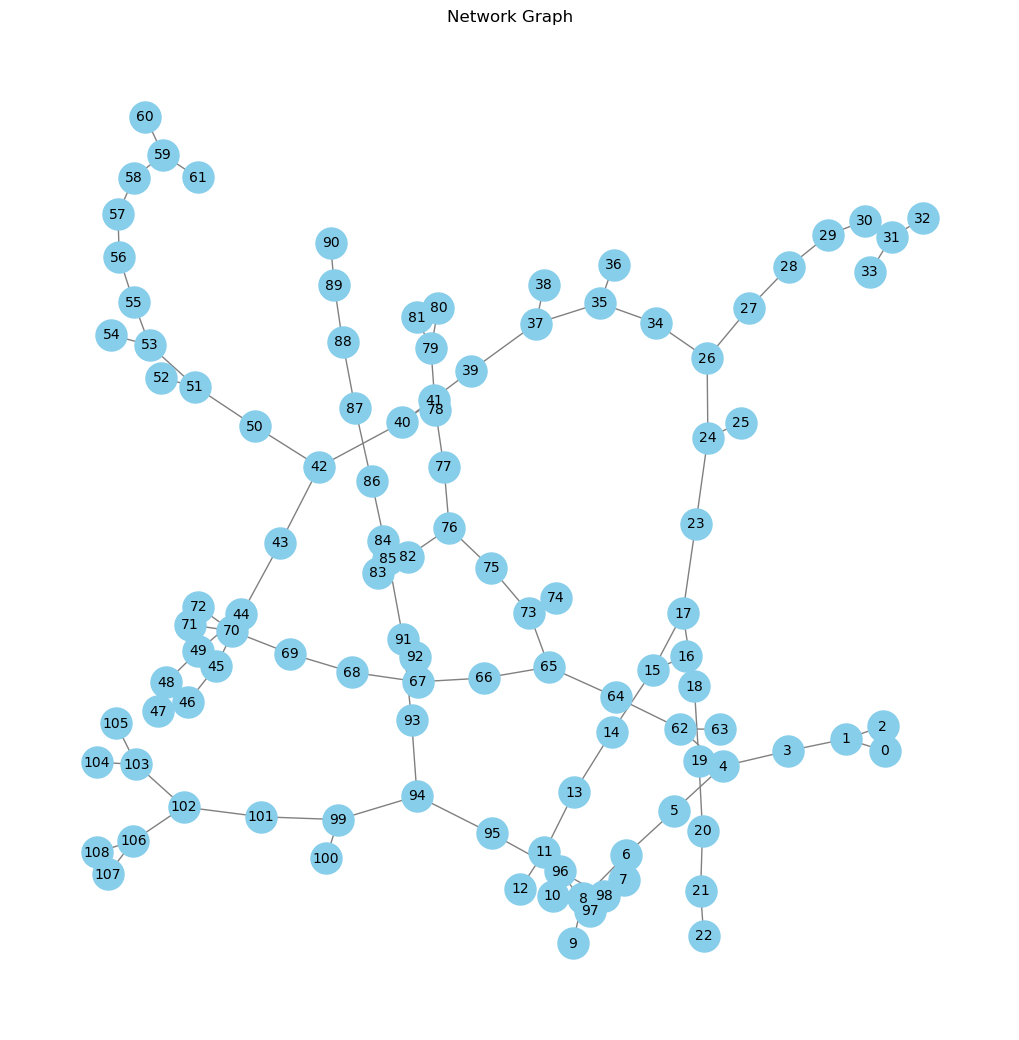

In [5]:
graph, label = dataset[135257] 
import networkx as nx
import matplotlib.pyplot as plt

edge_index = graph['edge_index']
num_nodes = graph['num_nodes']

G = nx.Graph()

G.add_nodes_from(range(num_nodes))

edges = list(zip(edge_index[0], edge_index[1]))
G.add_edges_from(edges)

plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500, font_size=10)
plt.title("Network Graph")
plt.show()

In [6]:
graph, label = dataset[182987] 

In [7]:
edge_index = graph['edge_index']
num_nodes = graph['num_nodes']
G = nx.Graph()

G.add_nodes_from(range(num_nodes))

edges = list(zip(edge_index[0], edge_index[1]))
G.add_edges_from(edges)

In [8]:
# results = pd.read_csv('subgroups_graph_OGBG-MolHIV.csv', index_col=0)
# results.reset_index(inplace=True)
# results.rename(columns={'index': r'Unnamed\: 0'}, inplace=True)
results = pd.read_csv('subgroups_graph_OGBG-MolHIV.csv')

In [9]:
graph_list = [182987, 135257, 200289, 104795]

prototypes = [159, 272]

reference_groups = {
    159: [159, 158, 160, 156, 163, 162, 161, 164, 155, 157],
    272: [272, 274, 273, 264, 263, 265, 275, 278, 261, 279, 266, 276, 277]
}
subgroups = {
    159: [159, 158, 160, 156],
    272: [272, 274, 273, 264, 263]
}

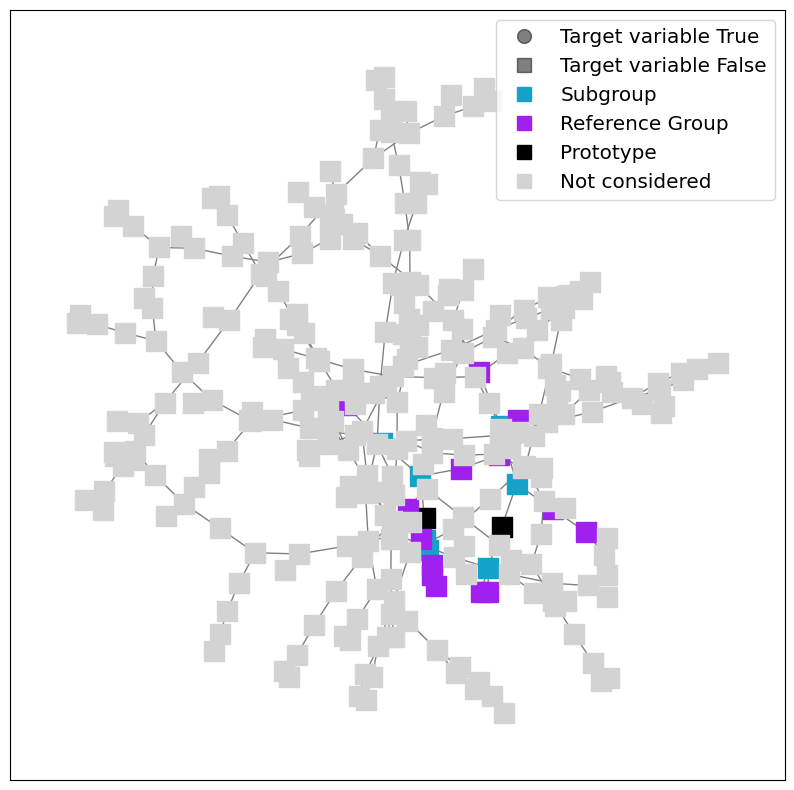

In [10]:
# def get_node_status(node, prototype):
#     matching_rows = results.loc[results.index == prototype]
#     if matching_rows.empty:
#         return None
#     idx = matching_rows.index[0]
#     ranks_list = ast.literal_eval(results.loc[idx, 'ranks'])
#     for rank_node, status in ranks_list:
#         if rank_node == node:
#             return status
#     return None

def get_node_status(node, prototype):
    index_prototype = results[results['Unnamed: 0'] == prototype].index[0]
    ranks_list = ast.literal_eval(results['ranks'][index_prototype])
    for rank_node, status in ranks_list:
        if rank_node == node:
            return status

prototype_nodes_true = []
prototype_nodes_false = []
subgroup_nodes_true = []
subgroup_nodes_false = []
reference_group_nodes_true = []
reference_group_nodes_false = []
therest_nodes = set(G.nodes())

for prototype in prototypes:
    prototype_nodes = [node for node in G.nodes() if node == prototype]
    prototype_nodes_true.extend([node for node in prototype_nodes if get_node_status(node, prototype)])
    prototype_nodes_false.extend([node for node in prototype_nodes if not get_node_status(node, prototype)])

    subgroup_nodes = [node for node in subgroups[prototype] if node != prototype]
    subgroup_nodes_true.extend([node for node in subgroup_nodes if get_node_status(node, prototype)])
    subgroup_nodes_false.extend([node for node in subgroup_nodes if not get_node_status(node, prototype)])

    reference_group_nodes = [node for node in reference_groups[prototype] if node not in subgroups[prototype] and node != prototype]
    reference_group_nodes_true.extend([node for node in reference_group_nodes if get_node_status(node, prototype)])
    reference_group_nodes_false.extend([node for node in reference_group_nodes if not get_node_status(node, prototype)])

    therest_nodes -= set(reference_groups[prototype])
    therest_nodes -= {prototype}

therest_group_nodes_true = [node for node in therest_nodes if get_node_status(node, prototype)]
therest_group_nodes_false = [node for node in therest_nodes if not get_node_status(node, prototype)]

plt.figure(figsize=(10, 10))
position = nx.spring_layout(G)

nx.draw_networkx_edges(G, pos=position, edge_color='gray')

nx.draw_networkx_nodes(G, pos=position, nodelist=prototype_nodes_true, node_color='#000000', node_shape='o', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=prototype_nodes_false, node_color='#000000', node_shape='s', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=subgroup_nodes_true, node_color='#14a3c7', node_shape='o', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=subgroup_nodes_false, node_color='#14a3c7', node_shape='s', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=reference_group_nodes_true, node_color='#A020F0', node_shape='o', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=reference_group_nodes_false, node_color='#A020F0', node_shape='s', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=therest_group_nodes_true, node_color='lightgray', node_shape='o', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=therest_group_nodes_false, node_color='lightgray', node_shape='s', node_size=200)

circle_marker = Line2D([0], [0], marker='o', color='black', label='Target variable True', markersize=10, linestyle='None', markerfacecolor='black', alpha=0.5)
square_marker = Line2D([0], [0], marker='s', color='black', label='Target variable False', markersize=10, linestyle='None', markerfacecolor='black', alpha=0.5)

prototype_marker = Line2D([0], [0], marker='s', color='#000000', label='Prototype', markersize=10, linestyle='None', markerfacecolor='#000000', alpha=1)
subgroup_marker = Line2D([0], [0], marker='s', color='#14a3c7', label='Subgroup', markersize=10, linestyle='None', markerfacecolor='#14a3c7', alpha=1)
reference_marker = Line2D([0], [0], marker='s', color='#A020F0', label='Reference Group', markersize=10, linestyle='None', markerfacecolor='#A020F0', alpha=1)
therest_marker = Line2D([0], [0], marker='s', color='lightgray', label='Not considered', markersize=10, linestyle='None', markerfacecolor='lightgray', alpha=1)

plt.legend(handles=[circle_marker, square_marker, subgroup_marker, reference_marker, prototype_marker, therest_marker], loc='upper right', fontsize='x-large')

plt.show()

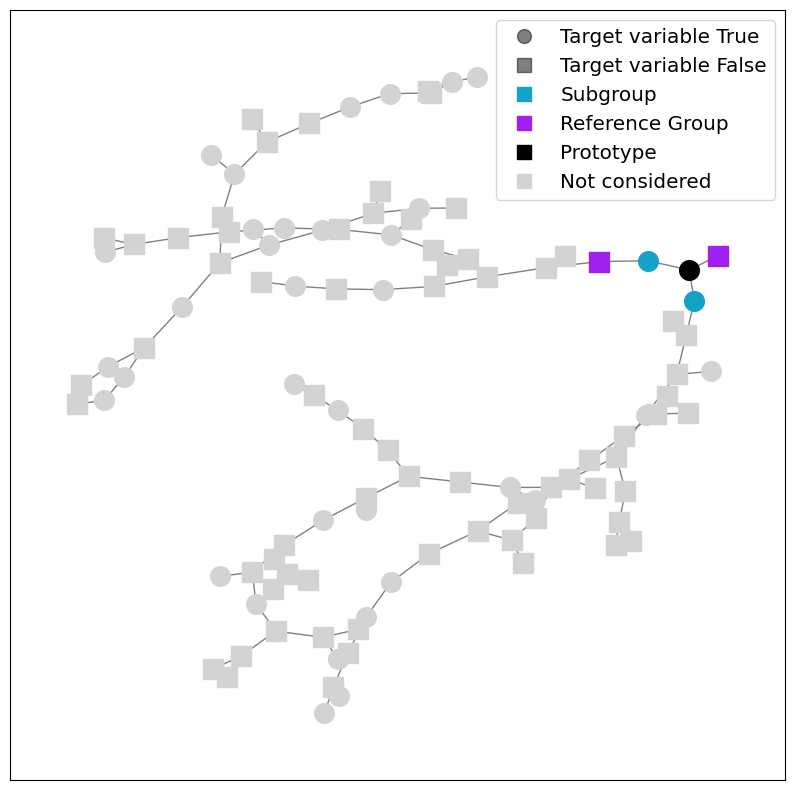

In [11]:
graph, label = dataset[135257] 

edge_index = graph['edge_index']
num_nodes = graph['num_nodes']
G = nx.Graph()

G.add_nodes_from(range(num_nodes))

edges = list(zip(edge_index[0], edge_index[1]))
G.add_edges_from(edges)

results = pd.read_csv('subgroups_graph_OGBG-MolHIV.csv', index_col=0)
results.index = results.index.astype(int)
results.columns = results.columns.str.strip()

prototypes = [11, 58]

reference_groups = {
    11: [11, 10, 13, 12, 14],
    58: [58, 59, 57, 60, 61]
}
subgroups = {
    11: [11, 10, 13],
    58: [58, 59, 57]
}

def get_node_status(node, prototype):
    ranks_list = ast.literal_eval(results.loc[prototype, 'Ranks'])
    for rank_node, status in ranks_list:
        if rank_node == node:
            return status
    return None

prototype_nodes_true = []
prototype_nodes_false = []
subgroup_nodes_true = []
subgroup_nodes_false = []
reference_group_nodes_true = []
reference_group_nodes_false = []
therest_nodes = set(G.nodes())

for prototype in prototypes:
    if prototype not in results.index:
        continue
    prototype_nodes = [node for node in G.nodes() if node == prototype]
    prototype_nodes_true.extend([node for node in prototype_nodes if get_node_status(node, prototype)])
    prototype_nodes_false.extend([node for node in prototype_nodes if not get_node_status(node, prototype)])

    subgroup_nodes = [node for node in subgroups[prototype] if node != prototype]
    subgroup_nodes_true.extend([node for node in subgroup_nodes if get_node_status(node, prototype)])
    subgroup_nodes_false.extend([node for node in subgroup_nodes if not get_node_status(node, prototype)])

    reference_group_nodes = [node for node in reference_groups[prototype] if node not in subgroups[prototype] and node != prototype]
    reference_group_nodes_true.extend([node for node in reference_group_nodes if get_node_status(node, prototype)])
    reference_group_nodes_false.extend([node for node in reference_group_nodes if not get_node_status(node, prototype)])

    therest_nodes -= set(reference_groups[prototype])
    therest_nodes -= {prototype}

valid_prototypes = [p for p in prototypes if p in results.index]
last_prototype = valid_prototypes[-1]

therest_group_nodes_true = [node for node in therest_nodes if get_node_status(node, last_prototype)]
therest_group_nodes_false = [node for node in therest_nodes if not get_node_status(node, last_prototype)]

plt.figure(figsize=(10, 10))
position = nx.spring_layout(G)

nx.draw_networkx_edges(G, pos=position, edge_color='gray')

nx.draw_networkx_nodes(G, pos=position, nodelist=prototype_nodes_true, node_color='#000000', node_shape='o', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=prototype_nodes_false, node_color='#000000', node_shape='s', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=subgroup_nodes_true, node_color='#14a3c7', node_shape='o', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=subgroup_nodes_false, node_color='#14a3c7', node_shape='s', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=reference_group_nodes_true, node_color='#A020F0', node_shape='o', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=reference_group_nodes_false, node_color='#A020F0', node_shape='s', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=therest_group_nodes_true, node_color='lightgray', node_shape='o', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=therest_group_nodes_false, node_color='lightgray', node_shape='s', node_size=200)

circle_marker = Line2D([0], [0], marker='o', color='black', label='Target variable True', markersize=10, linestyle='None', markerfacecolor='black', alpha=0.5)
square_marker = Line2D([0], [0], marker='s', color='black', label='Target variable False', markersize=10, linestyle='None', markerfacecolor='black', alpha=0.5)

prototype_marker = Line2D([0], [0], marker='s', color='#000000', label='Prototype', markersize=10, linestyle='None', markerfacecolor='#000000', alpha=1)
subgroup_marker = Line2D([0], [0], marker='s', color='#14a3c7', label='Subgroup', markersize=10, linestyle='None', markerfacecolor='#14a3c7', alpha=1)
reference_marker = Line2D([0], [0], marker='s', color='#A020F0', label='Reference Group', markersize=10, linestyle='None', markerfacecolor='#A020F0', alpha=1)
therest_marker = Line2D([0], [0], marker='s', color='lightgray', label='Not considered', markersize=10, linestyle='None', markerfacecolor='lightgray', alpha=1)

plt.legend(handles=[circle_marker, square_marker, subgroup_marker, reference_marker, prototype_marker, therest_marker], loc='upper right', fontsize='x-large')

plt.show()

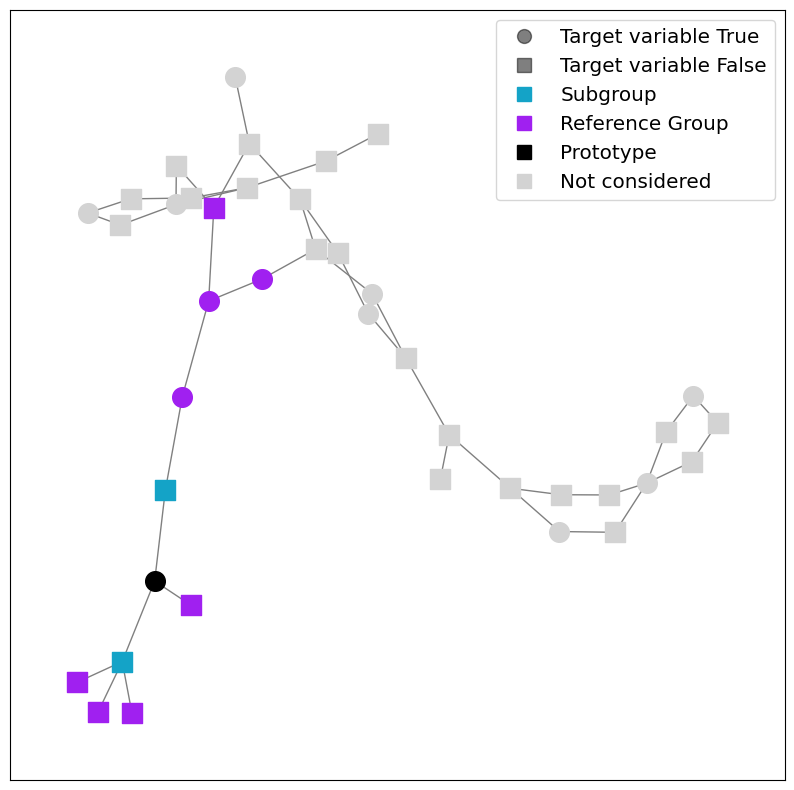

In [12]:
graph, label = dataset[200289] 

edge_index = graph['edge_index']
num_nodes = graph['num_nodes']
G = nx.Graph()

G.add_nodes_from(range(num_nodes))

edges = list(zip(edge_index[0], edge_index[1]))
G.add_edges_from(edges)

results = pd.read_csv('subgroups_graph_OGBG-MolHIV.csv')

prototypes = [29, 13]

reference_groups = {
    29: [29, 30, 28, 27, 25, 31, 34],
    13: [13, 15, 12, 14, 16, 17, 18, 11, 10, 9, 19]
}
subgroups = {
    29: [29, 30, 28, 27],
    13: [13, 15, 12]
}

def get_node_status(node, prototype):
    ranks_list = ast.literal_eval(results.loc[prototype, 'Ranks'])
    for rank_node, status in ranks_list:
        if rank_node == node:
            return status
    return None

prototype_nodes_true = []
prototype_nodes_false = []
subgroup_nodes_true = []
subgroup_nodes_false = []
reference_group_nodes_true = []
reference_group_nodes_false = []
therest_nodes = set(G.nodes())

for prototype in prototypes:
    if prototype not in results.index:
        continue
    prototype_nodes = [node for node in G.nodes() if node == prototype]
    prototype_nodes_true.extend([node for node in prototype_nodes if get_node_status(node, prototype)])
    prototype_nodes_false.extend([node for node in prototype_nodes if not get_node_status(node, prototype)])

    subgroup_nodes = [node for node in subgroups[prototype] if node != prototype]
    subgroup_nodes_true.extend([node for node in subgroup_nodes if get_node_status(node, prototype)])
    subgroup_nodes_false.extend([node for node in subgroup_nodes if not get_node_status(node, prototype)])

    reference_group_nodes = [node for node in reference_groups[prototype] if node not in subgroups[prototype] and node != prototype]
    reference_group_nodes_true.extend([node for node in reference_group_nodes if get_node_status(node, prototype)])
    reference_group_nodes_false.extend([node for node in reference_group_nodes if not get_node_status(node, prototype)])

    therest_nodes -= set(reference_groups[prototype])
    therest_nodes -= {prototype}

therest_group_nodes_true = [node for node in therest_nodes if get_node_status(node, prototype)]
therest_group_nodes_false = [node for node in therest_nodes if not get_node_status(node, prototype)]

plt.figure(figsize=(10, 10))
position = nx.spring_layout(G)

nx.draw_networkx_edges(G, pos=position, edge_color='gray')

nx.draw_networkx_nodes(G, pos=position, nodelist=prototype_nodes_true, node_color='#000000', node_shape='o', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=prototype_nodes_false, node_color='#000000', node_shape='s', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=subgroup_nodes_true, node_color='#14a3c7', node_shape='o', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=subgroup_nodes_false, node_color='#14a3c7', node_shape='s', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=reference_group_nodes_true, node_color='#A020F0', node_shape='o', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=reference_group_nodes_false, node_color='#A020F0', node_shape='s', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=therest_group_nodes_true, node_color='lightgray', node_shape='o', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=therest_group_nodes_false, node_color='lightgray', node_shape='s', node_size=200)

circle_marker = Line2D([0], [0], marker='o', color='black', label='Target variable True', markersize=10, linestyle='None', markerfacecolor='black', alpha=0.5)
square_marker = Line2D([0], [0], marker='s', color='black', label='Target variable False', markersize=10, linestyle='None', markerfacecolor='black', alpha=0.5)

prototype_marker = Line2D([0], [0], marker='s', color='#000000', label='Prototype', markersize=10, linestyle='None', markerfacecolor='#000000', alpha=1)
subgroup_marker = Line2D([0], [0], marker='s', color='#14a3c7', label='Subgroup', markersize=10, linestyle='None', markerfacecolor='#14a3c7', alpha=1)
reference_marker = Line2D([0], [0], marker='s', color='#A020F0', label='Reference Group', markersize=10, linestyle='None', markerfacecolor='#A020F0', alpha=1)
therest_marker = Line2D([0], [0], marker='s', color='lightgray', label='Not considered', markersize=10, linestyle='None', markerfacecolor='lightgray', alpha=1)

plt.legend(handles=[circle_marker, square_marker, subgroup_marker, reference_marker, prototype_marker, therest_marker], loc='upper right', fontsize='x-large')

plt.show()

In [13]:
graph, label = dataset[104795] 

edge_index = graph['edge_index']
num_nodes = graph['num_nodes']
G = nx.Graph()

G.add_nodes_from(range(num_nodes))

edges = list(zip(edge_index[0], edge_index[1]))
G.add_edges_from(edges)

results = pd.read_csv('subgroups_graph_OGBG-MolHIV.csv')


prototypes = [199, 113]

reference_groups = {
    199: [199, 197, 200, 198, 201, 254, 196, 203, 192, 202, 256],
    113: [113, 111, 114, 112, 117, 115, 106, 105, 119, 118, 116]
}
subgroups = {
    199: [199, 197, 200, 198, 201, 254, 196],
    113: [113, 111, 114, 112, 117, 115, 106]
}

def get_node_status(node, prototype):
    ranks_list = ast.literal_eval(results.loc[prototype, 'Ranks'])
    for rank_node, status in ranks_list:
        if rank_node == node:
            return status
    return None

prototype_nodes_true = []
prototype_nodes_false = []
subgroup_nodes_true = []
subgroup_nodes_false = []
reference_group_nodes_true = []
reference_group_nodes_false = []
therest_nodes = set(G.nodes())

for prototype in prototypes:
    prototype_nodes = [node for node in G.nodes() if node == prototype]
    prototype_nodes_true.extend([node for node in prototype_nodes if get_node_status(node, prototype)])
    prototype_nodes_false.extend([node for node in prototype_nodes if not get_node_status(node, prototype)])

    subgroup_nodes = [node for node in subgroups[prototype] if node != prototype]
    subgroup_nodes_true.extend([node for node in subgroup_nodes if get_node_status(node, prototype)])
    subgroup_nodes_false.extend([node for node in subgroup_nodes if not get_node_status(node, prototype)])

    reference_group_nodes = [node for node in reference_groups[prototype] if node not in subgroups[prototype] and node != prototype]
    reference_group_nodes_true.extend([node for node in reference_group_nodes if get_node_status(node, prototype)])
    reference_group_nodes_false.extend([node for node in reference_group_nodes if not get_node_status(node, prototype)])

    therest_nodes -= set(reference_groups[prototype])
    therest_nodes -= {prototype}

therest_group_nodes_true = [node for node in therest_nodes if get_node_status(node, prototype)]
therest_group_nodes_false = [node for node in therest_nodes if not get_node_status(node, prototype)]

plt.figure(figsize=(10, 10))
position = nx.spring_layout(G)

nx.draw_networkx_edges(G, pos=position, edge_color='gray')

nx.draw_networkx_nodes(G, pos=position, nodelist=prototype_nodes_true, node_color='#000000', node_shape='o', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=prototype_nodes_false, node_color='#000000', node_shape='s', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=subgroup_nodes_true, node_color='#14a3c7', node_shape='o', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=subgroup_nodes_false, node_color='#14a3c7', node_shape='s', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=reference_group_nodes_true, node_color='#A020F0', node_shape='o', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=reference_group_nodes_false, node_color='#A020F0', node_shape='s', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=therest_group_nodes_true, node_color='lightgray', node_shape='o', node_size=200)
nx.draw_networkx_nodes(G, pos=position, nodelist=therest_group_nodes_false, node_color='lightgray', node_shape='s', node_size=200)

circle_marker = Line2D([0], [0], marker='o', color='black', label='Target variable True', markersize=10, linestyle='None', markerfacecolor='black', alpha=0.5)
square_marker = Line2D([0], [0], marker='s', color='black', label='Target variable False', markersize=10, linestyle='None', markerfacecolor='black', alpha=0.5)

prototype_marker = Line2D([0], [0], marker='s', color='#000000', label='Prototype', markersize=10, linestyle='None', markerfacecolor='#000000', alpha=1)
subgroup_marker = Line2D([0], [0], marker='s', color='#14a3c7', label='Subgroup', markersize=10, linestyle='None', markerfacecolor='#14a3c7', alpha=1)
reference_marker = Line2D([0], [0], marker='s', color='#A020F0', label='Reference Group', markersize=10, linestyle='None', markerfacecolor='#A020F0', alpha=1)
therest_marker = Line2D([0], [0], marker='s', color='lightgray', label='Not considered', markersize=10, linestyle='None', markerfacecolor='lightgray', alpha=1)

plt.legend(handles=[circle_marker, square_marker, subgroup_marker, reference_marker, prototype_marker, therest_marker], loc='upper right', fontsize='x-large')

plt.show()

KeyError: 199